# KNN - Correntes de motor

Testando 30 rodadas com algoritmo **KNN** nos conjuntos de dados de correntes de motor com dados extraídos por _dwt_.

## Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Características dos dados

| Características     |  Valor|
|:--------------------|------:|
| Classes             |      7|
| Amostras            |   7851|
| Dimensionalidade    |     38|
| Amostras por classe |       |

## Carregando dados e rótulos

In [2]:
def remove_nan(row):
    for i in range(len(row)):
        if np.isnan(row[i]):
            row[i] = 0
    return row

# Carregando data
# chain_raw = [remove_nan(element) for element in np.load('corrente1.npy')]

'''Carregando os 3 arquivos'''
ndarray = np.append(
    arr=np.load("corrente1.npy"),
    values=np.append(np.load("corrente2.npy"), np.load("corrente3.npy"), 0),
    axis=0)

chain_raw = [remove_nan(element) for element in ndarray]

# Carregando Rótulos
chain_labels = ['DesvioD1','DesvioD2','DesvioD3','DesvioD4','DesvioD5','DesvioA5',
                'MeanAD1','MeanAD2','MeanAD3','MeanAD4','MeanAD5','MeanADA5',
                'MedianAD1','MedianAD2','MedianAD3','MedianAD4','MedianAD5','MedianADA5',
                'KurtosisD1','KurtosisD2','KurtosisD3','KurtosisD4','KurtosisD5','KurtosisA5',
                'SkewnessD1','SkewnessD2','SkewnessD3','SkewnessD4','SkewnessD5','SkewnessA5',
                'EnergiaD1','EnergiaD2','EnergiaD3','EnergiaD4','EnergiaD5','EnergiaA5',
                'frequencia','carga']


chain_ds = {
    # Removendo coluna de 'classe' (posição 37) dos dados
    "data":[np.append(element[:37], element[38]) for element in chain_raw],
    "feature_names":chain_labels,
    "target":[classe[37] for classe in chain_raw],
    "target_names":["Normal", "HI-1", "HI-2", "HI-3", "LI-1", "LI-2", "LI-3"]
}

## Gerando DataFrame

In [3]:
chainDF = pd.DataFrame(data=chain_ds["data"], columns=chain_ds["feature_names"])
chainDF['classe'] = chain_ds['target']
chainDF

,DesvioD1,DesvioD2,DesvioD3,DesvioD4,DesvioD5,DesvioA5,MeanAD1,MeanAD2,MeanAD3,MeanAD4,...,SkewnessA5,EnergiaD1,EnergiaD2,EnergiaD3,EnergiaD4,EnergiaD5,EnergiaA5,frequencia,carga,classe
0,0.011068,0.012344,0.015708,0.043970,0.194858,4.328422,0.008821,0.009825,0.012597,0.037672,...,-0.008416,0.000104,0.000065,0.000053,0.000206,0.002024,0.998676,30.0,100.0,0.0
1,0.011120,0.012410,0.015607,0.044449,0.194661,4.321575,0.008882,0.009880,0.012495,0.037952,...,-0.010261,0.000106,0.000066,0.000052,0.000211,0.002026,0.998634,30.0,100.0,0.0
2,0.011137,0.012336,0.015913,0.048155,0.207760,4.318357,0.008886,0.009864,0.012703,0.040947,...,-0.009270,0.000106,0.000065,0.000054,0.000248,0.002310,0.997879,30.0,100.0,0.0
3,0.011085,0.012361,0.015787,0.045688,0.197433,4.336844,0.008823,0.009904,0.012679,0.038898,...,-0.009054,0.000104,0.000065,0.000053,0.000221,0.002069,0.998147,30.0,100.0,0.0
4,0.011101,0.012266,0.015716,0.043941,0.189413,4.342502,0.008833,0.009797,0.012583,0.037978,...,-0.011746,0.000104,0.000064,0.000052,0.000205,0.001900,0.998904,30.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,0.012272,0.014840,0.020940,0.094572,0.497473,3.279641,0.009772,0.011751,0.017396,0.083233,...,-0.006110,0.000219,0.000160,0.000159,0.001622,0.022454,0.975888,60.0,0.0,6.0
7847,0.012240,0.014735,0.021020,0.094695,0.498558,3.298809,0.009733,0.011655,0.017527,0.084111,...,-0.005818,0.000215,0.000156,0.000159,0.001609,0.022310,0.976734,60.0,0.0,6.0
7848,0.012176,0.014976,0.020883,0.094061,0.493900,3.266799,0.009675,0.011865,0.017336,0.082551,...,-0.004867,0.000217,0.000164,0.000160,0.001619,0.022329,0.976855,60.0,0.0,6.0
7849,0.012279,0.014980,0.020820,0.094614,0.496085,3.277904,0.009773,0.011855,0.017271,0.083364,...,-0.003115,0.000219,0.000163,0.000158,0.001627,0.022373,0.976795,60.0,0.0,6.0


In [4]:
chainDF.describe()

,DesvioD1,DesvioD2,DesvioD3,DesvioD4,DesvioD5,DesvioA5,MeanAD1,MeanAD2,MeanAD3,MeanAD4,...,SkewnessA5,EnergiaD1,EnergiaD2,EnergiaD3,EnergiaD4,EnergiaD5,EnergiaA5,frequencia,carga,classe
count,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,...,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000
mean,0.011659,0.013451,0.017627,0.063597,0.310475,3.312243,0.009272,0.010695,0.014307,0.054659,...,0.002218,0.000224,0.000147,0.000119,0.000808,0.009898,0.984748,45.091708,49.694306,3.006496
std,0.001102,0.001709,0.004701,0.030260,0.148925,0.809602,0.000859,0.001334,0.004020,0.025998,...,0.011577,0.000092,0.000059,0.000044,0.000560,0.007119,0.068205,9.991614,40.795070,1.977925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.068359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,0.011175,0.012369,0.014061,0.040414,0.192664,2.556062,0.008899,0.009862,0.011258,0.034660,...,-0.003327,0.000131,0.000098,0.000085,0.000333,0.003474,0.982502,35.000000,0.000000,1.000000
50%,0.011460,0.013052,0.016503,0.057861,0.282100,3.069992,0.009123,0.010388,0.013320,0.049756,...,0.004095,0.000220,0.000142,0.000111,0.000634,0.007886,0.991570,45.000000,50.000000,3.000000
75%,0.012027,0.014401,0.019949,0.080548,0.396623,4.180307,0.009574,0.011450,0.016239,0.069357,...,0.008388,0.000303,0.000187,0.000149,0.001255,0.016329,0.996287,55.000000,100.000000,5.000000
max,0.018549,0.020684,0.036409,0.172226,0.832394,5.370829,0.011858,0.015411,0.031664,0.150451,...,0.054295,0.000553,0.000413,0.000277,0.002222,0.025331,0.999192,60.000000,100.000000,6.000000


## Observando distribuição de classes

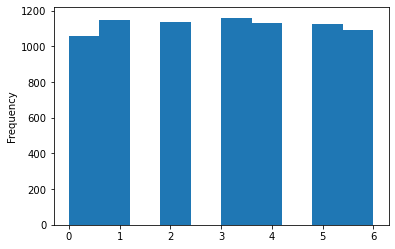

In [5]:
chainDF['classe'].plot(kind='hist')

## Realizando 1 rodada de Teste com KNN


- RODADA 0 - Semente 3477 -

- Acurácia 0.7024617996604414 -
- Sensibilidade [0.68421053 0.57863501 0.68465909 0.76358696 0.51940299 0.75739645
 0.93167702] -

              precision    recall  f1-score   support

      Normal       0.68      0.68      0.68       304
        HI-1       0.48      0.58      0.53       337
        HI-2       0.67      0.68      0.68       352
        HI-3       0.80      0.76      0.78       368
        LI-1       0.56      0.52      0.54       335
        LI-2       0.81      0.76      0.78       338
        LI-3       0.96      0.93      0.94       322

    accuracy                           0.70      2356
   macro avg       0.71      0.70      0.71      2356
weighted avg       0.71      0.70      0.71      2356

Matriz de confusão normalizada
[[0.68421053 0.125      0.05921053 0.02960526 0.07894737 0.01973684
  0.00328947]
 [0.10682493 0.57863501 0.06231454 0.02373887 0.21364985 0.01186944
  0.00296736]
 [0.06534091 0.10227273 0.68465909 0.04261364 0

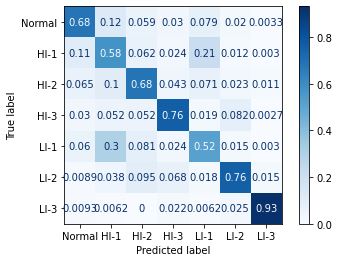

In [6]:
k_vizinhos = 5

chain_acc = []
chain_sns = []
used_seed = []

X, y = chain_ds['data'], chain_ds['target']

# Gerando inteiro aleatório para distribuição dos dados
semente = randint(0, 8001)
used_seed.append(semente)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semente)

# Instanciando classificador
classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

# Treinando modelo
classifier.fit(X_train, y_train)

# Realizando teste de classificação
y_pred = classifier.predict(X_test)

# Adicionando resultados à lista
acc = accuracy_score(y_test, y_pred)
chain_acc.append(acc)

sns = recall_score(y_test, y_pred, average=None)
chain_sns.append(sns)

print("\n- RODADA 0 - Semente {} -\n".format(semente))
print("- Acurácia {acc} -\n- Sensibilidade {sns} -\n".format(acc=acc, sns=sns))

print(classification_report(y_test, y_pred, target_names=chain_ds['target_names']))

print("Matriz de confusão normalizada")
print(confusion_matrix(y_test, y_pred, normalize='true'))

plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels=chain_ds['target_names'],
                                cmap=plt.cm.Blues,
                                normalize='true')

## Realizando 30 rodadas de Teste com KNN

In [7]:
for rodada in range(1, 30):

    # Gerando inteiro aleatório para distribuição dos dados
    semente = randint(0, 8001)
    while semente in used_seed:
        semente = randint(0, 8001)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semente)

    # Instanciando classificador
    classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

    # Treinando modelo
    classifier.fit(X_train, y_train)

    # Realizando teste de classificação
    y_pred = classifier.predict(X_test)

    # Adicionando resultados à lista
    acc = accuracy_score(y_test, y_pred)
    chain_acc.append(acc)

    sns = recall_score(y_test, y_pred, average=None)
    chain_sns.append(sns)

    print("\n- RODADA {turn} - Semente {seed} -\n".format(turn=rodada, seed=semente))
    print("- Acurácia {acc} -\n- Sensibilidade {sns} -\n".format(acc=acc, sns=sns))

    print(classification_report(y_test, y_pred, target_names=chain_ds['target_names']))

    print("Matriz de confusão normalizada")
    print(confusion_matrix(y_test, y_pred, normalize='true'))

    # Descomente a linha abaixo para plotar matriz de confusão normalizada
    # plot_confusion_matrix(classifier, X_test, y_test, display_labels=chain_ds['target_names'], cmap=plt.cm.Blues, normalize='true')


- RODADA 1 - Semente 4458 -

- Acurácia 0.7292020373514432 -
- Sensibilidade [0.71111111 0.54857143 0.71556886 0.83333333 0.53977273 0.83478261
 0.94339623] -

              precision    recall  f1-score   support

      Normal       0.71      0.71      0.71       315
        HI-1       0.51      0.55      0.53       350
        HI-2       0.68      0.72      0.70       334
        HI-3       0.82      0.83      0.83       342
        LI-1       0.60      0.54      0.57       352
        LI-2       0.85      0.83      0.84       345
        LI-3       0.97      0.94      0.96       318

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada
[[0.71111111 0.0984127  0.07619048 0.01904762 0.08253968 0.00952381
  0.0031746 ]
 [0.08857143 0.54857143 0.08857143 0.04285714 0.21714286 0.01142857
  0.00285714]
 [0.06287425 0.10179641 0.71556886 0.03592814 0

## Gerando DataFrame de Acurácia e Sensibilidade por rodada

In [8]:
metricDF = pd.DataFrame(
    data=chain_sns,
    columns=['S - {}'.format(name) for name in chain_ds['target_names']])

metricDF['Acurácia'] = chain_acc
metricDF

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
0,0.684211,0.578635,0.684659,0.763587,0.519403,0.757396,0.931677,0.702462
1,0.711111,0.548571,0.715569,0.833333,0.539773,0.834783,0.943396,0.729202
2,0.695385,0.588235,0.697605,0.756677,0.523392,0.743363,0.959627,0.706282
3,0.707317,0.540390,0.715068,0.797101,0.544643,0.758209,0.893617,0.706282
4,0.720721,0.594675,0.672414,0.811765,0.550769,0.775148,0.955090,0.726231
5,0.656805,0.574405,0.683735,0.806154,0.562300,0.750742,0.938667,0.715195
6,0.696970,0.562893,0.697548,0.788406,0.545198,0.769886,0.944272,0.714346
7,0.739414,0.561350,0.684814,0.823881,0.570175,0.736544,0.930233,0.721562
8,0.744337,0.574124,0.694704,0.759760,0.575581,0.814493,0.939940,0.726231
9,0.697368,0.629518,0.660767,0.776536,0.540059,0.747312,0.936306,0.711800


In [9]:
metricDF.describe()

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.711706,0.577906,0.689188,0.788071,0.549196,0.778749,0.937829,0.718124
std,0.024847,0.024257,0.017509,0.025710,0.024671,0.031795,0.015760,0.007720
min,0.656805,0.530026,0.645251,0.750000,0.498551,0.725948,0.893617,0.702462
25%,0.690313,0.564004,0.680409,0.772822,0.532553,0.753470,0.930594,0.713710
50%,0.713825,0.578548,0.690744,0.781865,0.545605,0.773204,0.938688,0.718379
75%,0.732281,0.590148,0.697591,0.804472,0.562593,0.801415,0.947933,0.723896
max,0.755102,0.629518,0.716012,0.843450,0.600610,0.852090,0.967262,0.733022
